In [1]:
from wgangp.db_utils import *
from acf_utils import *
from utility import *

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [133]:
run = 18
number = 2000
mpl.rcParams.update({'font.size': 22})
os.mkdir(f'plots/wgangp_{run}')

In [4]:
path = f'/scratch/scarpolini/gaussian/wgangp/runs/{run}/{number}_gen.h5'
gen = load_model(path)

trajs = gen.predict(np.random.normal(0, 1, size=(500000, 100)))
os.mkdir(f'/storage/scarpolini/databases/gaussian/wgangp/runs/{run}')
np.save(f'/storage/scarpolini/databases/gaussian/wgangp/runs/{run}/gen_trajs_{number}', trajs)
del trajs

In [134]:
#path = f'/storage/scarpolini/databases/gaussian/wgangp/runs/{run}/gen_trajs_{number}.npy'
path = f'/scratch/scarpolini/gaussian/wgangp/runs/{run}/gen_trajs_{number}.npy'
gen = np.load(path)

M = gen.max()
m = gen.min()
print('massimo, minimo: ',M,m)

#db = np.load('/scratch/scarpolini/databases/velocities.npy')[:,:,0]
#M = db.max() 
M = 0.2710607938691473 
#m = db.min()
m = -0.27237746706221777
semidisp = (M-m)/2.
media = (M+m)/2.
gen = gen*semidisp + media
print('veri',M,m)
M = gen.max()
m = gen.min()
print('generati',M,m)

massimo, minimo:  0.7905955 -0.8269787
veri 0.2710607938691473 -0.27237746706221777
generati 0.21416157 -0.22536425


In [10]:
import scipy.ndimage as ff
#gen = ff.gaussian_filter1d(gen[:,:,0],sigma=2.6,mode='nearest') ## la gaussiana è troncata a 4 sigma
#np.save(f'/storage/scarpolini/databases/gaussian/wgangp/runs/{run}/gen_trajs_{number}_media.npy', gen)

(500, 600)

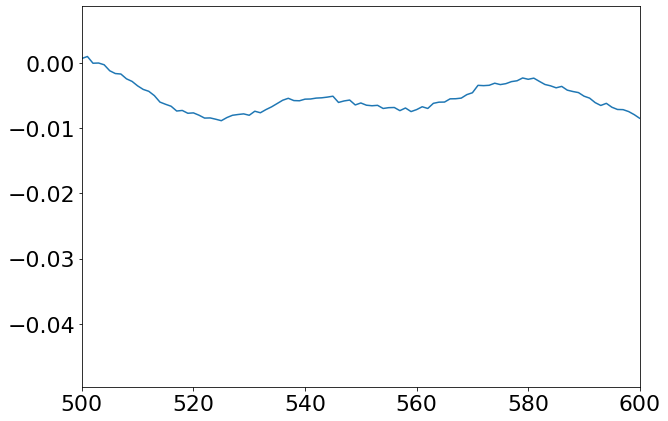

In [16]:
plt.figure(figsize=(10,7))
plt.plot(gen[0])
plt.xlim([500,600])

# PDF V_x e A_x

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


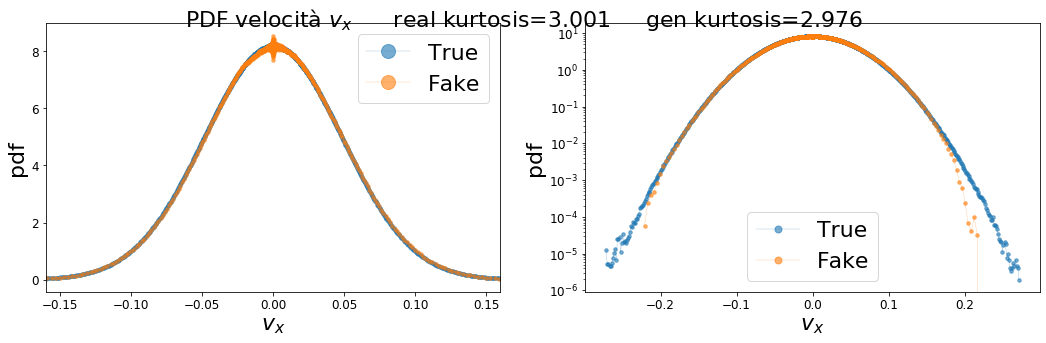

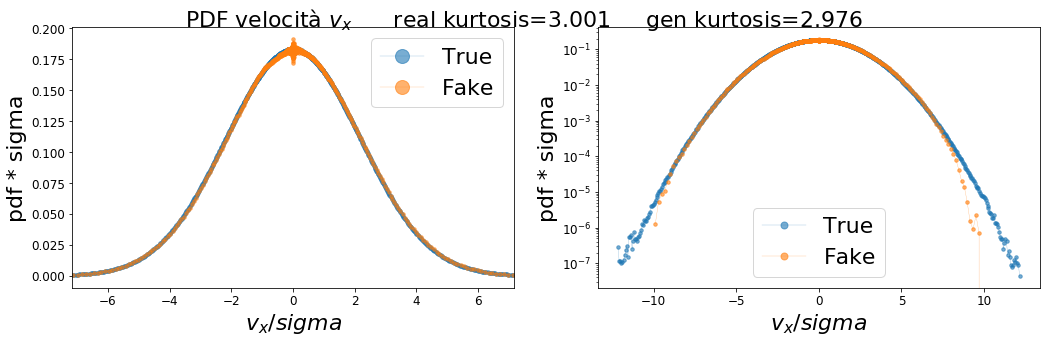

In [135]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/real/pdf_vx_smooth2')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 0.022348702829320784
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen.min(),gen.max(),800,1e-4)
hist, bin_edges = np.histogram(gen.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.16,0.16])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
#ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.16/vel_std,0.16/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
#ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

fig.tight_layout()
fign.tight_layout()
#fig.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}.png', fmt='png', dpi=60)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/real/pdf_vx_smooth')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 0.022348702829320784
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen.min(),gen.max(),800,1e-4)
hist, bin_edges = np.histogram(gen.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.08,0.08])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
#ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.08/vel_std,0.08/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
#ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

In [136]:
gm = np.gradient(gen,axis=1)

1.0000201639682937
1.000364564798567


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


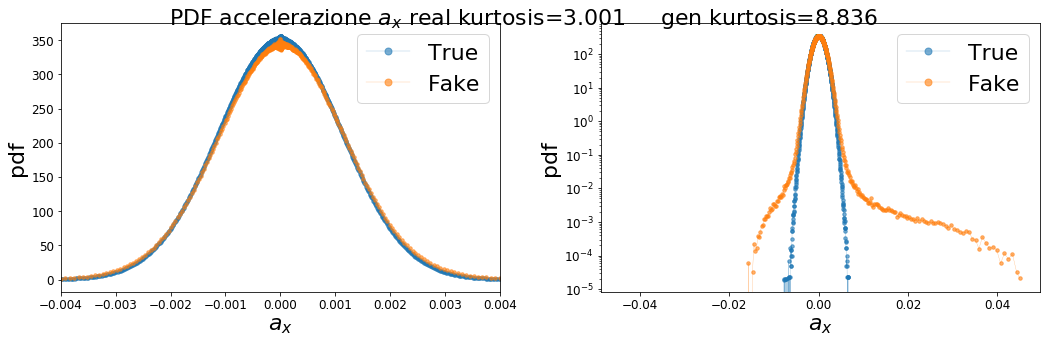

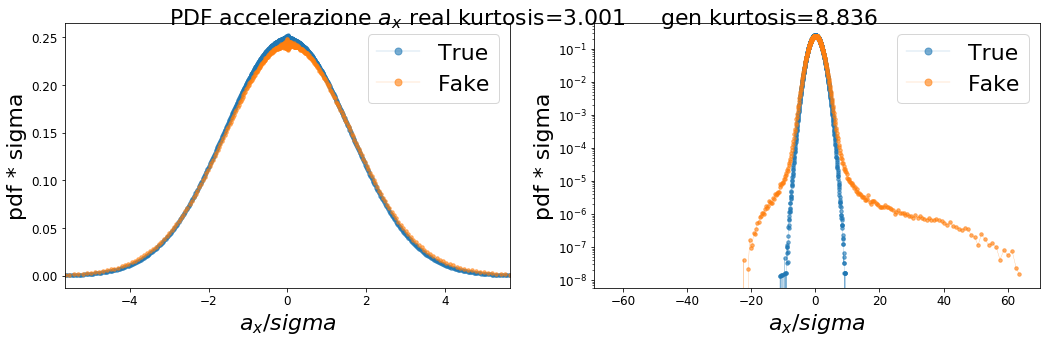

In [137]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/real/pdf_ax_smooth2')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0007071521252908372
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),800,1e-5)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.004,0.004])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.004/acc_std,0.004/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.tight_layout()
fign.tight_layout()
#fig.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}.png', fmt='png', dpi=60)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/real/pdf_ax_smooth')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0007071521252908372
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),800,1e-5)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.001,0.001])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.001/acc_std,0.001/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

In [5]:
gmm = np.gradient(gm,axis=1)

1.0000180155531768
1.0002452322479545


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


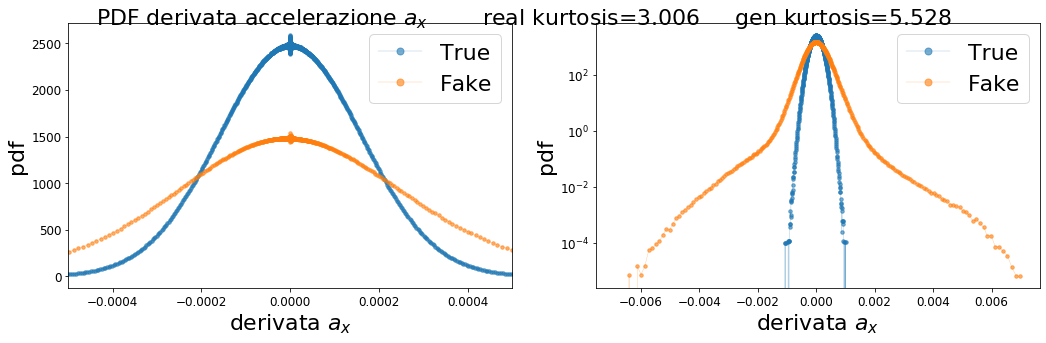

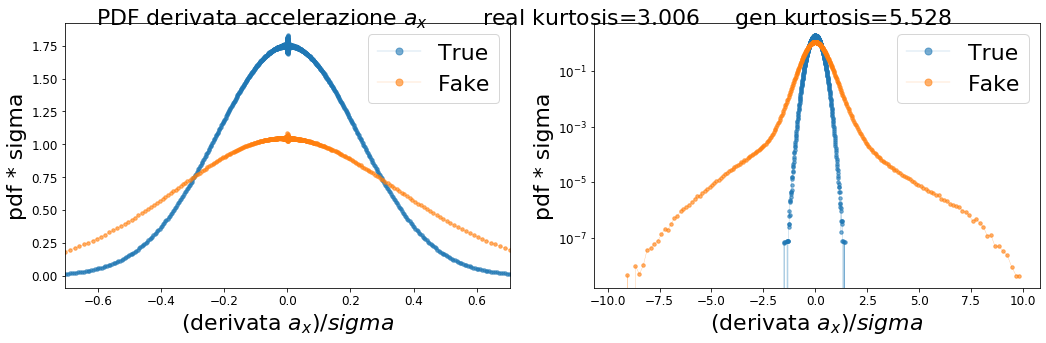

In [336]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/real/pdf_aax_smooth2')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
aacc_std = 0.0005004074948497711
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gmm.min(),gmm.max(),800,1e-6)
hist, bin_edges = np.histogram(gmm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('derivata $a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.0005,0.0005])
ax2.legend(markerscale=2)
ax2.set_xlabel('derivata $a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('(derivata $a_x )/ sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.0005/acc_std,0.0005/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('(derivata $a_x )/ sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

## Calcolo funzioni di struttura Lagrangiane di ordine p: $$ S_p^L(\tau) = <(v_x(t+\tau)-(v_x(t))^p> $$

## Kurtosis o Flatness: $$ K^L(\tau) = \frac{S_4^L(\tau)}{[S_2^L(\tau)]^2} $$

## Hypertailedness: $$ H^L(\tau) = \frac{S_6^L(\tau)}{[S_2^L(\tau)]^3} $$

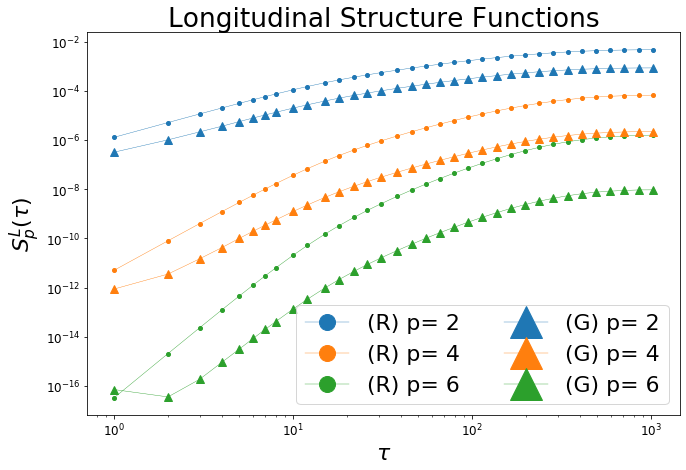

In [138]:
npart = 50000
struct_real = np.load(f"data/real/struct_function2_500000_part_smooth.npy")
struct_gen = np.load(f"data/wgangp/struct_function_{npart}_part_gen_{run}_{number}.npy")
semidisp = (0.11189475166222602-(-0.11938135580450368))/2.

mpl.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,7))

plt.title("Longitudinal Structure Functions")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],struct_real[:,ii],label="(R) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
for ii in range(1,4):
    plt.plot(struct_gen[:,0],struct_gen[:,ii]*semidisp**(ii*2),label="(G) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
#    plt.plot(struct_gen[:,0],struct_gen[:,ii],label="(G) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/wgangp_{run}/struct_func_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

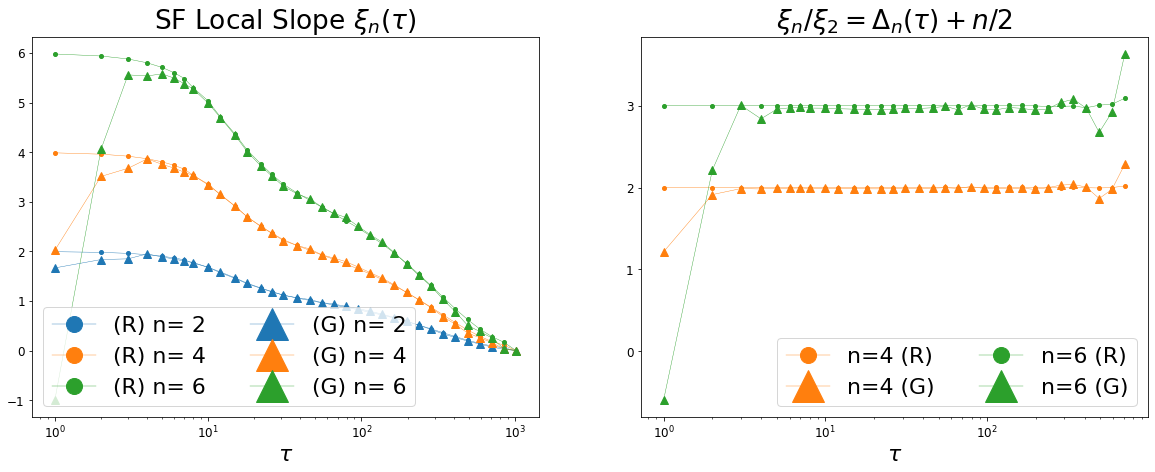

In [139]:
struct_real_log = np.log(struct_real)
struct_gen_log = np.log(struct_gen)
dl_struct_real = np.zeros(shape=struct_real.shape)
dl_struct_gen = np.zeros(shape=struct_gen.shape)
for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct_gen[jj,ii] = (np.log(struct_gen[jj+1,ii]*semidisp**(ii*2)) - np.log(struct_gen[jj,ii]*semidisp**(ii*2)))/(np.log(struct_gen[jj+1,0])-np.log(struct_gen[jj,0]))

plt.figure(figsize=(10*2,7))
plt.subplot(1,2,1)
plt.title("SF Local Slope $\\xi_n(\\tau)$")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="(R) n= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
for ii in range(1,4):
    plt.plot(struct_gen[:,0],dl_struct_gen[:,ii],label="(G) n= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
plt.legend(ncol=2)
plt.xlabel("$\\tau$")

#plt.tight_layout()

plt.subplot(1,2,2)
plt.title("$ \\xi_n / \\xi_2 = \\Delta_n(\\tau) + n/2$")
plt.xscale('log')

plt.plot(struct_real[:-2,0],dl_struct_real[:-2,2]/dl_struct_real[:-2,1],label="n=4 (R)",marker='.',lw=0.4,ms=8, color='C1')
plt.plot(struct_gen[:-2,0],dl_struct_gen[:-2,2]/dl_struct_gen[:-2,1],label="n=4 (G)",marker='^',lw=0.4,ms=8, color='C1')
#plt.plot(struct_real[:-2,0], [4./2.]*len(struct_real[:-2,0]),lw=1, color='C1')


plt.plot(struct_real[:-2,0],dl_struct_real[:-2,3]/dl_struct_real[:-2,1],label="n=6 (R)",marker='.',lw=0.4,ms=8, color='C2')
plt.plot(struct_gen[:-2,0],dl_struct_gen[:-2,3]/dl_struct_gen[:-2,1],label="n=6 (G)",marker='^',lw=0.4,ms=8, color='C2')
#plt.plot(struct_real[:-2,0], [6./2.]*len(struct_real[:-2,0]),lw=1, color='C2')


plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.savefig(f"plots/wgangp_{run}/struct_func_loc_slope_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

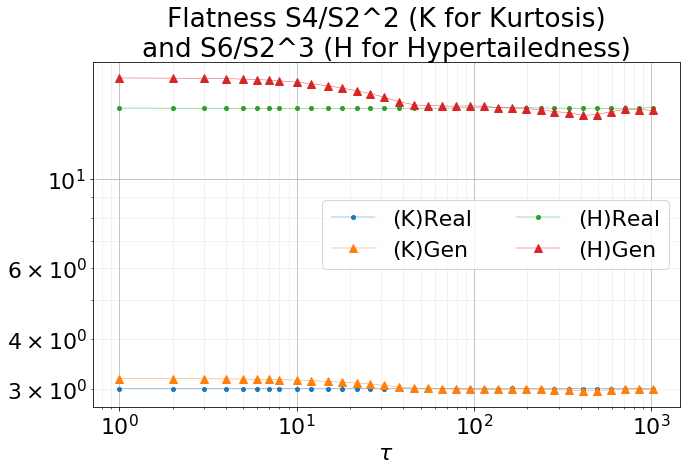

In [7]:
plt.figure(figsize=(10,7))
plt.title("Flatness S4/S2^2 (K for Kurtosis)\nand S6/S2^3 (H for Hypertailedness)")
# plt.yscale('log')
plt.xscale('log')
plt.yscale('log')

plt.plot(struct_real[:,0],struct_real[:,2]/struct_real[:,1]**2.,marker='.', label="(K)Real", lw=0.4,ms=8,color='C0')
plt.plot(struct_gen[:,0],struct_gen[:,2]/struct_gen[:,1]**2.,marker='^', label="(K)Gen",lw=0.4,ms=8,color='C1')
#plt.plot(struct_real_more[:,0],[3.]*len(struct_real_more[:,0]),label="Gaussian")

plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="(H)Real", lw=0.4,ms=8,color='C2')
plt.plot(struct_gen[:,0],struct_gen[:,3]/struct_gen[:,1]**3.,marker='^', label="(H)Gen",lw=0.4,ms=8,color='C3')

#plt.ylabel("$K(\\tau)$")
plt.xlabel("$\\tau$")
plt.legend(ncol=2)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()
plt.savefig(f"plots/wgangp_{run}/struct_func_flatness_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

# ACF_x

acf found


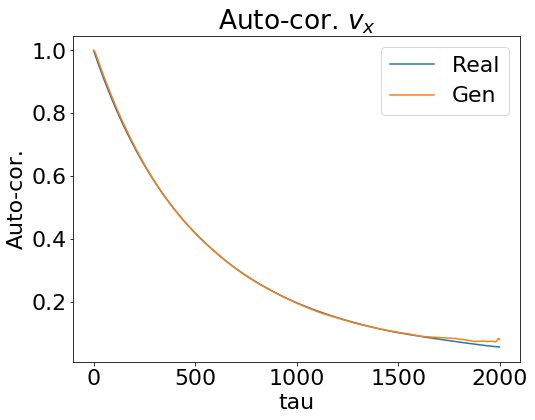

In [45]:
mean = np.load('/storage/scarpolini/databases/gaussian_process_acf.npy')
plt.figure(figsize=(8,6))
plt.plot(mean, label='Real')
try: 
    acfg = np.load(f'data/acf_x_gen_{run}_{number}.npy')
    print('acf found')
except:
    print("calcolo nuove acf")
    acfg = acf_x(gen,npart=50000)
    np.save(f'data/acf_x_gen_{run}_{number}',acfg)

plt.plot(acfg, label='Gen')
plt.title('Auto-cor. $v_x$')
#plt.xlim([0,1000])
plt.xlabel('tau')
plt.legend()
plt.ylabel('Auto-cor.')
plt.savefig(f'plots/wgangp_{run}/gan_test_acfx_{run}_{number}.png', fmt='png', dpi=60)
plt.show()

# ACF$_x$ accelerazione

calcolo nuove acf


<Figure size 576x432 with 0 Axes>

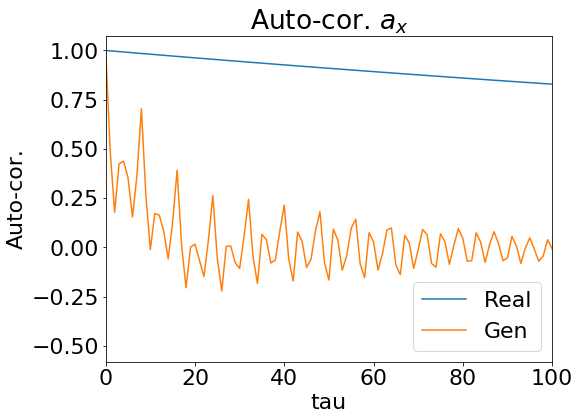

In [46]:
plt.figure(figsize=(8,6))
mean = np.load('/storage/scarpolini/databases/gaussian_process_acf.npy')

plt.figure(figsize=(8,6))
plt.plot(mean, label='Real')
try: 
    acfg = np.load(f'data/acf_x_gen_{run}_{number}_acc.npy')
    print('acf found')
except:
    print("calcolo nuove acf")
    acfg = acf_x(gm,npart=50000)
    np.save(f'data/acf_x_gen_{run}_{number}_acc',acfg)

plt.plot(acfg, label='Gen')
plt.title('Auto-cor. $a_x$')
plt.xlim([0,100])
plt.xlabel('tau')
plt.legend()
plt.ylabel('Auto-cor.')
plt.savefig(f'plots/wgangp_{run}/gan_test_acfx_acc_{run}_{number}.png', fmt='png', dpi=60)
plt.show()

# Exit time

In [16]:
paths = [f'data/acf_x_gen_{run}_{number}.npy']
try: exit_times = np.load(f'data/exit_time_x_gen_{run}_{number}.npy')
except:
    exit_times = gen_exit_time(run, number, 0.5)
    np.save(f'data/exit_time_x_gen_{run}_{number}',exit_times)

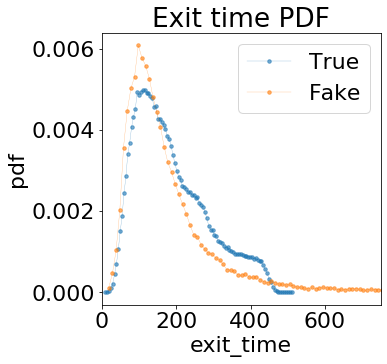

In [17]:
plt.figure(figsize=(5,5))
#exit_times = np.load('../databases/exit_time_0.50_lagrangian.npy')
#hist, bin_edges = np.histogram(exit_times,bins=100, density=True)
#print(save_pdf(bin_edges, hist, 'data/pdf_exit_time'))
hist, bin_edges = load_pdf('data/pdf_exit_time')
plt.plot(bin_edges, hist, alpha=0.6, label='True', marker='.', lw=0.3, ms=7)
hist, bin_edges = np.histogram(exit_times, bins=200, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
bin_edges = bin_edges[:-1]
plt.plot(bin_edges, hist, alpha=0.6, label='Fake', marker='.', lw=0.3, ms=7)
#plt.yscale('log')
plt.title('Exit time PDF')
plt.ylabel('pdf')
plt.xlabel('exit_time')
plt.xlim([0,750])
plt.legend()
plt.savefig(f'plots/wgangp_{run}/gan_test_exit_time_{run}_{number}.png',fmt='png',dpi=100)

# Plot Traiettorie Generate e Reali

In [72]:
db = np.load('../databases/velocities.npy')[:,:,0]

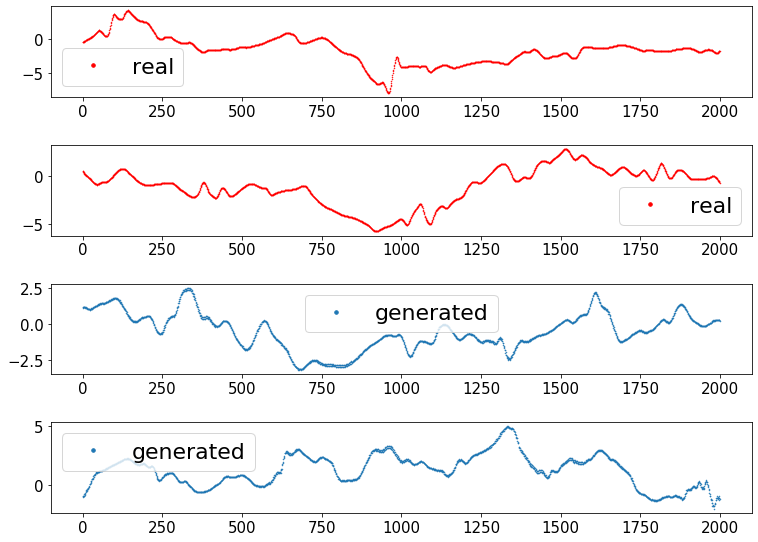

In [73]:
idx1 = np.random.randint(0, db.shape[0], 2)
idx2 = np.random.randint(0, gen.shape[0], 2)
trajs = db[idx1]
gen_trajs = gen[idx2]
plt.figure(figsize=(11, 2*len(trajs)+2*len(gen_trajs)))
plt.title('esempi di velocità vere e generate')

for i, traj in enumerate(trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1)
    plt.plot(traj, color='red', label='real', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1+len(trajs))
    plt.plot(traj, label='generated', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_trajs_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

[38800 40021 26395 40159   294  7819 38581  9334 48652 34631]


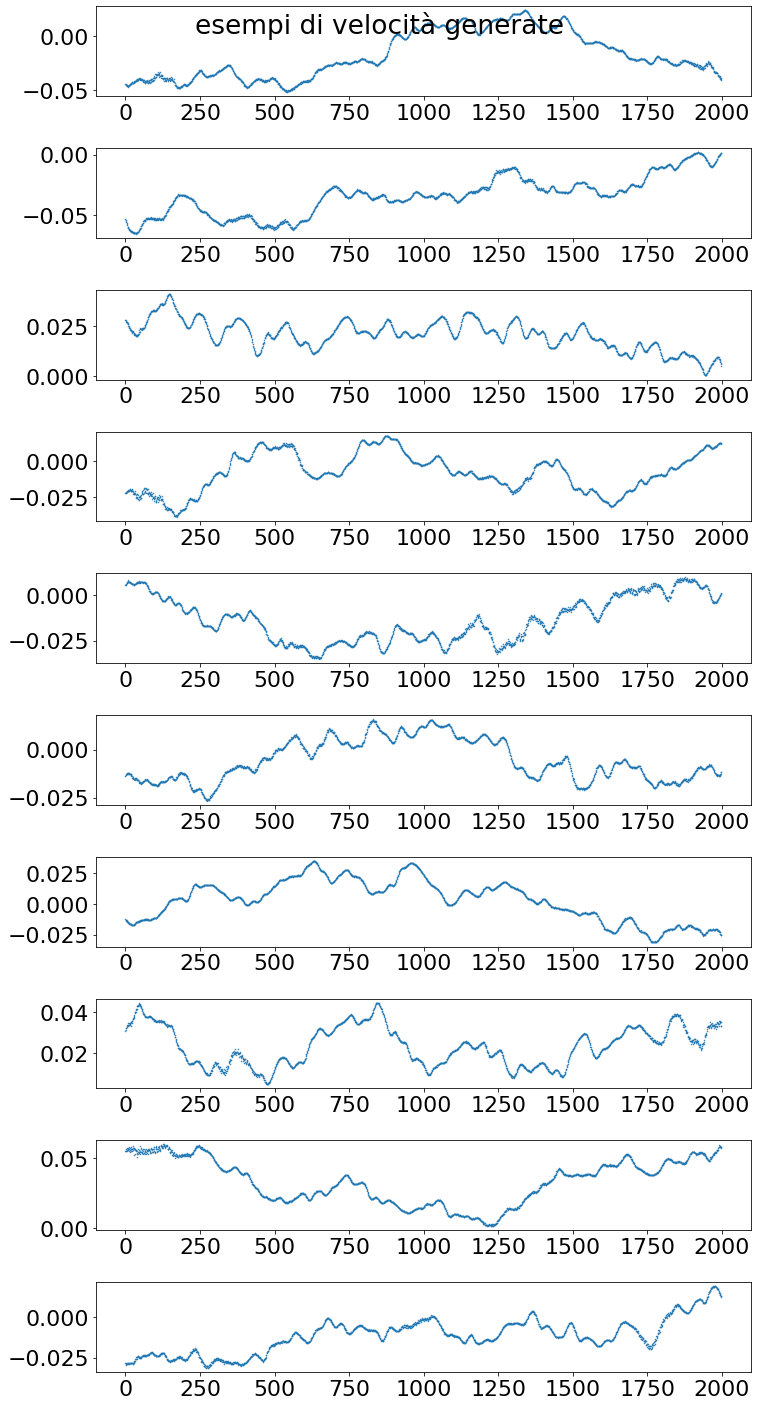

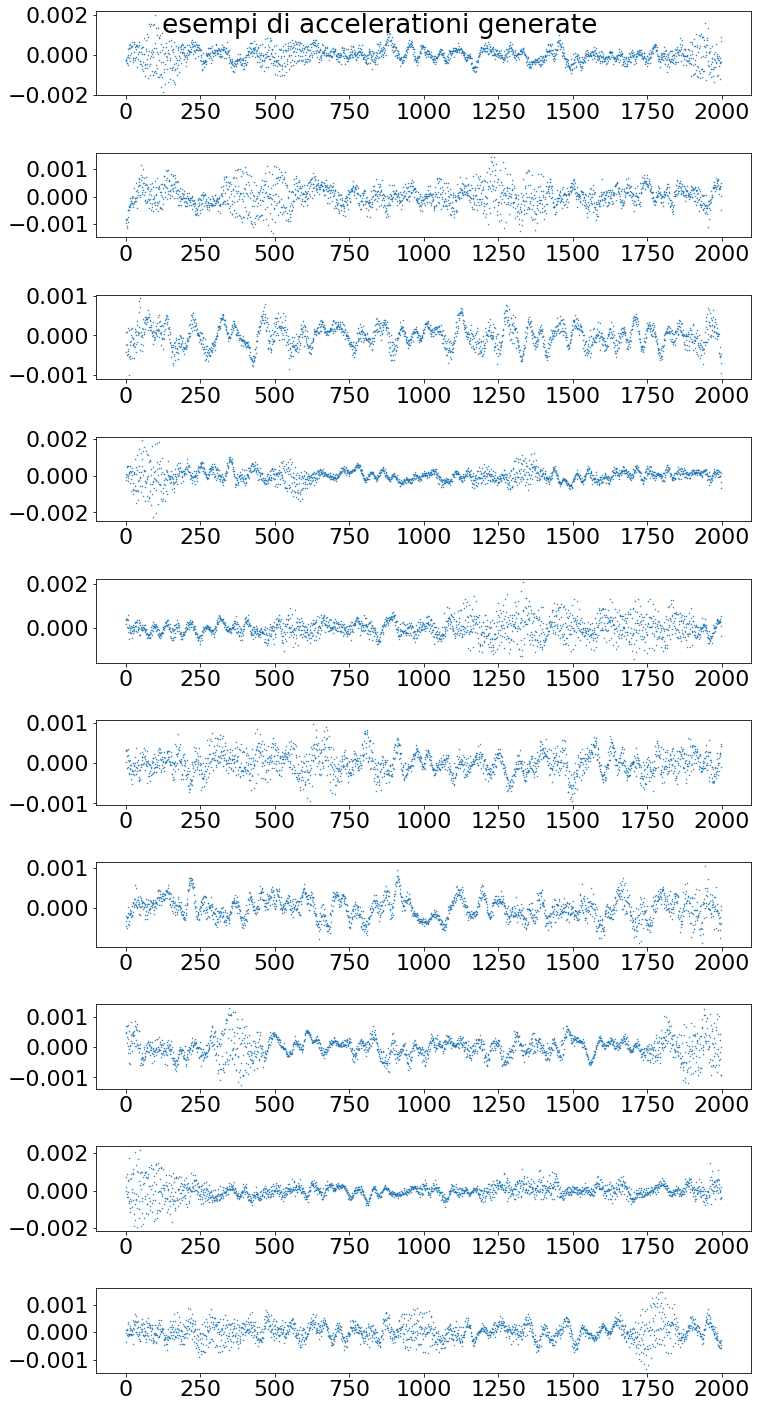

In [78]:
idx2 = np.random.randint(0, gen.shape[0],10)
print(idx2)
gen_trajs = gen[idx2]
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di velocità generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

gen_trajs = np.gradient(gen_trajs, axis=1)
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di accelerationi generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_acc_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

In [17]:

plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

# Confronto turb - ou - ou_smooth

In [187]:
s_turbr = np.load(f"../lagrangian/data/real/struct_function_327680_part.npy")
s_turbg = np.load(f"../lagrangian/data/wgangp/struct_function_500000_part_gen_51_1750_media.npy")

s_our = np.load(f"data/real/struct_function_500000_part.npy")
s_oug = np.load(f"data/wgangp/struct_function_500000_part_gen_3_1750.npy")

s_ousr = np.load(f"data/real/struct_function_500000_part_smooth.npy")
s_ousg = np.load(f"data/wgangp/struct_function_500000_part_gen_6_1750_media.npy")

#semidisp = (0.11189475166222602-(-0.11938135580450368))/2.

mpl.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,7))

plt.title("Longitudinal SF")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],struct_real[:,ii],label="(R) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
for ii in range(1,4):
    plt.plot(struct_gen[:,0],struct_gen[:,ii]*semidisp**(ii*2),label="(G) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
#    plt.plot(struct_gen[:,0],struct_gen[:,ii],label="(G) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/wgangp_{run}/struct_func_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/wgangp/struct_function_500000_part_gen_13_1750_media.npy'

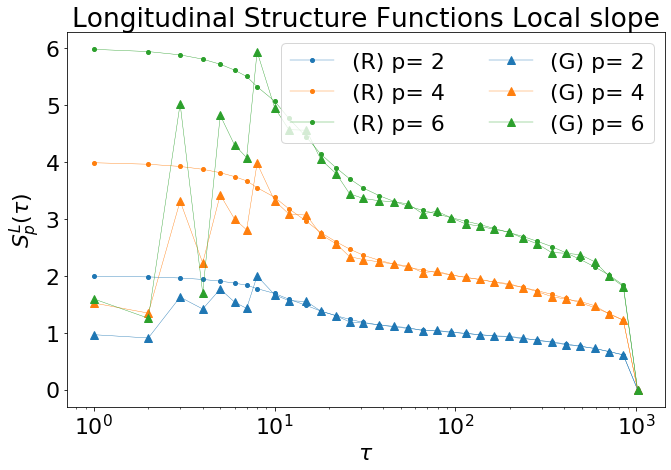

In [41]:
struct_real_log = np.log(struct_real)
struct_gen_log = np.log(struct_gen)
dl_struct_real = np.zeros(shape=struct_real.shape)
dl_struct_gen = np.zeros(shape=struct_gen.shape)
for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct_gen[jj,ii] = (np.log(struct_gen[jj+1,ii]*semidisp**(ii*2)) - np.log(struct_gen[jj,ii]*semidisp**(ii*2)))/(np.log(struct_gen[jj+1,0])-np.log(struct_gen[jj,0]))

plt.figure(figsize=(10,7))
plt.title("Longitudinal Structure Functions Local slope")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="(R) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
for ii in range(1,4):
    plt.plot(struct_gen[:,0],dl_struct_gen[:,ii],label="(G) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/wgangp_{run}/struct_func_loc_slope_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

In [81]:
s = np.zeros(shape=(6,34,4))
s[0,:,:] = s_turbr
s[1,:,:] = s_turbg
s[2,:,:] = s_our
s[3,:,:] = s_oug
s[4,:,:] = s_ousr
s[5,:,:] = s_ousg

In [82]:
colors = ['C0','C0','C1','C1','C2','C2']
labels = ['Turb R','Turb G','OU R','OU G','OUS R','OUS G']
markers = ['.','^']*3

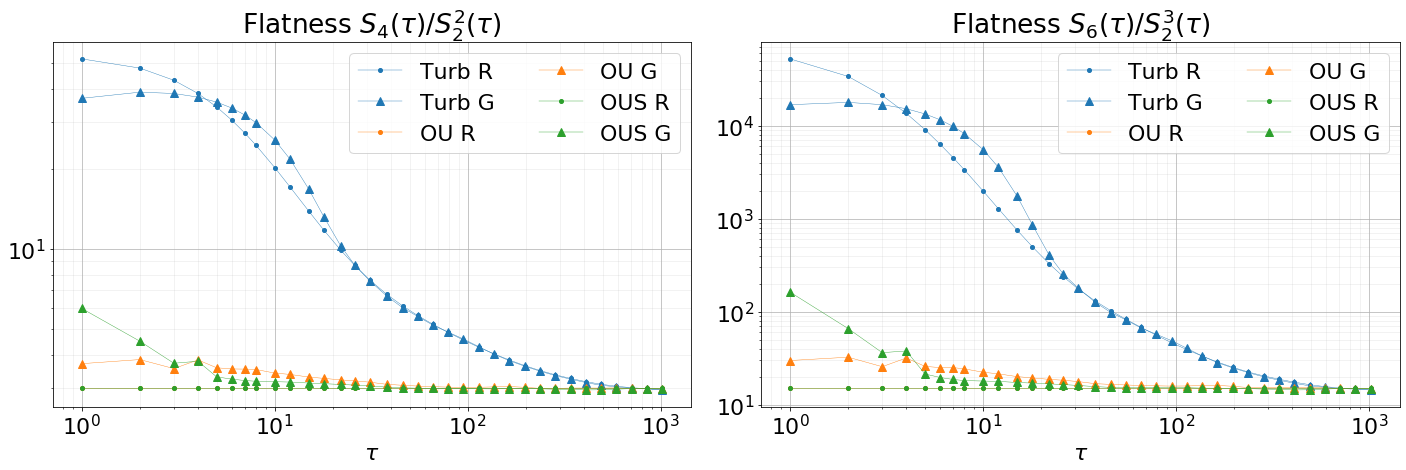

In [103]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("Flatness $S_4(\\tau)/S_2^2(\\tau)$")
# plt.yscale('log')
plt.xscale('log')
plt.yscale('log')

for i in range(6):
    plt.plot(s[i,:,0],s[i,:,2]/s[i,:,1]**2.,marker=markers[i], label=labels[i], lw=0.4,ms=8,color=colors[i])

#plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="(H)Real", lw=0.4,ms=8,color='C2')
#plt.plot(struct_gen[:,0],struct_gen[:,3]/struct_gen[:,1]**3.,marker='^', label="(H)Gen",lw=0.4,ms=8,color='C3')

#plt.ylabel("$K(\\tau)$")
plt.xlabel("$\\tau$")
plt.legend(ncol=2)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)

plt.subplot(1,2,2)
plt.title("Flatness $S_6(\\tau)/S_2^3(\\tau)$")
# plt.yscale('log')
plt.xscale('log')
plt.yscale('log')

for i in range(6):
    plt.plot(s[i,:,0],s[i,:,3]/s[i,:,1]**3.,marker=markers[i], label=labels[i], lw=0.4,ms=8,color=colors[i])

plt.xlabel("$\\tau$")
plt.legend(ncol=2)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()

plt.savefig(f"plots/wgangp_{run}/struct_func_flatness_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

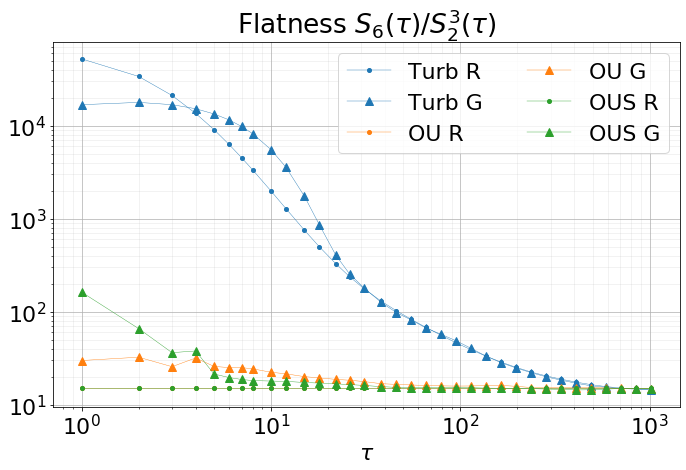

In [85]:
plt.title("Flatness $S_6(\\tau)/S_2^3(\\tau)$")
# plt.yscale('log')
plt.xscale('log')
plt.yscale('log')

for i in range(6):
    plt.plot(s[i,:,0],s[i,:,3]/s[i,:,1]**3.,marker=markers[i], label=labels[i], lw=0.4,ms=8,color=colors[i])

#plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="(H)Real", lw=0.4,ms=8,color='C2')
#plt.plot(struct_gen[:,0],struct_gen[:,3]/struct_gen[:,1]**3.,marker='^', label="(H)Gen",lw=0.4,ms=8,color='C3')

#plt.ylabel("$K(\\tau)$")
plt.xlabel("$\\tau$")
plt.legend(ncol=2)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()
plt.savefig(f"plots/wgangp_{run}/struct_func_flatness_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

# Analisi pesi

In [19]:
run =16
number = 1750

path = f'/scratch/scarpolini/gaussian/wgangp/runs/{run}/{number}_gen.h5'
generator = load_model(path)
wg = generator.get_weights()
del generator

run = 51
number = 1750

path = f'/scratch/scarpolini/lagrangian/wgangp/runs/{run}/{number}_gen.h5'
generator = load_model(path)
wl = generator.get_weights()
del generator

W0822 18:40:46.494691 47941916446208 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0822 18:40:47.503408 47941916446208 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [20]:
text = ['dense','dense bias', '','','','','conv2d transpose','', '','','','','conv2d transpose','', '','','','','conv2d transpose','', '','','','','conv2d transpose','', '','','','','conv2d transpose','','','']

In [21]:
for ii in range(len(wl)):
    print(ii, wl[ii].shape, wg[ii].shape, text[ii])
    
conv_index = [0,6,12,18,24,30]

0 (100, 3200) (100, 3200) dense
1 (3200,) (3200,) dense bias
2 (128,) (128,) 
3 (128,) (128,) 
4 (128,) (128,) 
5 (128,) (128,) 
6 (100, 1, 64, 128) (25, 1, 64, 128) conv2d transpose
7 (64,) (64,) 
8 (64,) (64,) 
9 (64,) (64,) 
10 (64,) (64,) 
11 (64,) (64,) 
12 (100, 1, 32, 64) (25, 1, 32, 64) conv2d transpose
13 (32,) (32,) 
14 (32,) (32,) 
15 (32,) (32,) 
16 (32,) (32,) 
17 (32,) (32,) 
18 (100, 1, 16, 32) (50, 1, 16, 32) conv2d transpose
19 (16,) (16,) 
20 (16,) (16,) 
21 (16,) (16,) 
22 (16,) (16,) 
23 (16,) (16,) 
24 (100, 1, 8, 16) (50, 1, 8, 16) conv2d transpose
25 (8,) (8,) 
26 (8,) (8,) 
27 (8,) (8,) 
28 (8,) (8,) 
29 (8,) (8,) 
30 (100, 1, 1, 8) (100, 1, 1, 8) conv2d transpose
31 (1,) (1,) 


In [22]:
npesi = []
for ii in conv_index:
    pesi = 1
    for jj in range(len(wg[ii].shape)):
        pesi = pesi*wg[ii].shape[jj]
    npesi.append(pesi)

In [23]:
plt.rcParams['font.size'] = 20
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

In [24]:
wg_all = wg[0].flatten()
for ii in conv_index:
    wg_all = np.r_[wg_all,wg[ii].flatten()]

wl_all = wl[0].flatten()
for ii in conv_index:
    wl_all = np.r_[wl_all,wl[ii].flatten()]

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


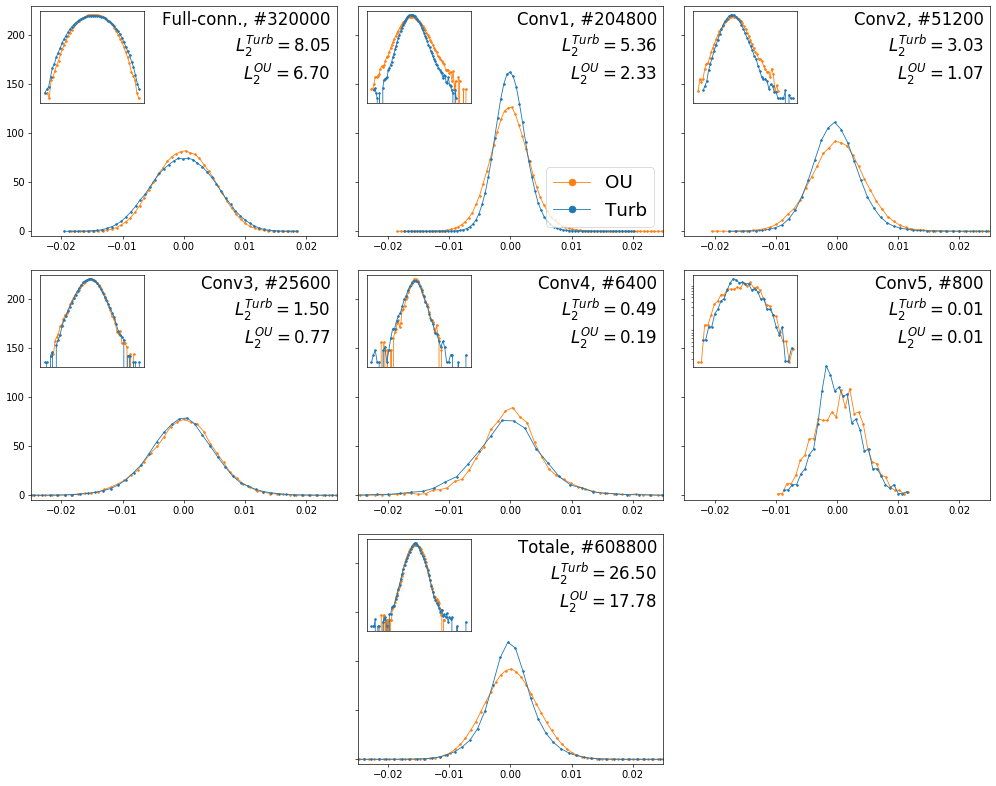

In [29]:
#plt.imshow(w[30][:,0,0,:].reshape(100,-1),aspect='auto')
#plt.colorbar()

nbin = [50,75,50,50,50,30]
nomi = ['Full-conn.', 'Conv1', 'Conv2', 'Conv3', 'Conv4', 'Conv5']


fig, ax = plt.subplots(3,3, figsize=(17,13.5), sharey=True, dpi=60)#, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

plot_indexes = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

for (ki, kj), ii in zip(plot_indexes,conv_index):
    #histg, binsg = np.histogram(wg[ii][:,0,0,:], bins=40, density=True)
    #histl, binsl = np.histogram(wl[ii][:,0,0,:], bins=40, density=True)
    histg, binsg = np.histogram(wg[ii], bins=nbin[3*ki+kj], density=True)
    histl, binsl = np.histogram(wl[ii], bins=nbin[3*ki+kj], density=True)
    for jj in range(binsg.shape[0]-1):
        binsg[jj] = 0.5*(binsg[jj+1] + binsg[jj])
        binsl[jj] = 0.5*(binsl[jj+1] + binsl[jj])
    binsg = binsg[:-1]
    binsl = binsl[:-1]
    ax[ki,kj].plot(binsg,histg,color="C1", label='OU')
    ax[ki,kj].plot(binsl,histl,color="C0", label='Turb')
    ax[ki,kj].text(0.98, 0.98, nomi[3*ki+kj]+f', #{npesi[3*ki+kj]}'+'\n $L_2^{Turb}=$%.2f\n $L_2^{OU}=$%.2f'%((wl[ii]**2.).sum(),(wg[ii]**2.).sum()), ha='right', va='top', transform=ax[ki,kj].transAxes)
    axins = ax[ki,kj].inset_axes([0.03,0.58,0.34,0.4])
    axins.plot(binsg,histg,color="C1")
    axins.plot(binsl,histl,color="C0")
    axins.set_yscale('log')
    axins.set_yticks([])
    axins.set_xticks([])
    ax[ki,kj].set_xlim([-0.025,0.025])
    ax[ki,kj].set_ylim([-5,230])
ax[0,1].legend(loc='lower right')

histg, binsg = np.histogram(wg_all, bins=75, density=True)
histl, binsl = np.histogram(wl_all, bins=75, density=True)
for jj in range(binsg.shape[0]-1):
    binsg[jj] = 0.5*(binsg[jj+1] + binsg[jj])
    binsl[jj] = 0.5*(binsl[jj+1] + binsl[jj])
binsg = binsg[:-1]
binsl = binsl[:-1]

ax[2,1].plot(binsg,histg,color="C1", label='OU')
ax[2,1].plot(binsl,histl,color="C0", label='Turb')
ax[2,1].text(0.98, 0.98, 'Totale'+f', #{sum(npesi)}'+'\n $L_2^{Turb}=$%.2f\n $L_2^{OU}=$%.2f'%((wl_all**2.).sum(),(wg_all**2.).sum()), ha='right', va='top', transform=ax[2,1].transAxes)
axins = ax[2,1].inset_axes([0.03,0.58,0.34,0.4])
axins.plot(binsg,histg,color="C1")
axins.plot(binsl,histl,color="C0")
axins.set_yscale('log')
axins.set_yticks([])
axins.set_xticks([])
ax[2,1].set_xlim([-0.025,0.025])
ax[2,1].set_ylim([-5,230])

ax[2,0].axis('off')
ax[2,2].axis('off')

        
fig.tight_layout()
fig.savefig('weights_pdfs',fmt='png', dpi=60)
fig.show()

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


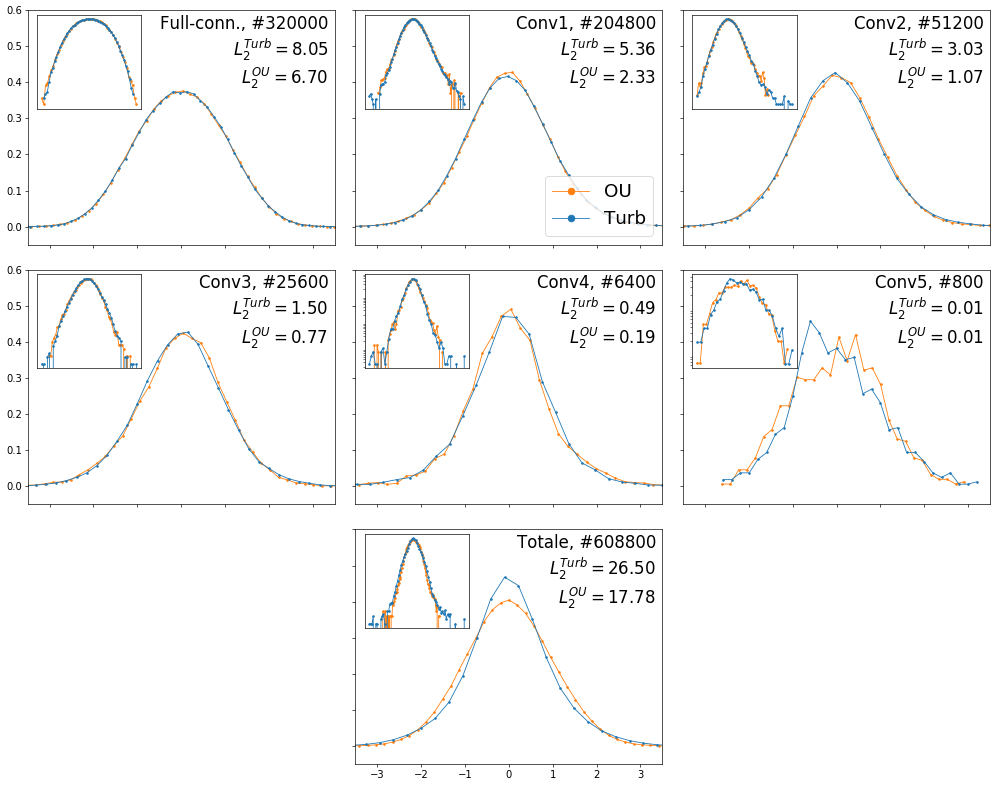

In [26]:
#plt.imshow(w[30][:,0,0,:].reshape(100,-1),aspect='auto')
#plt.colorbar()

nbin = [50,75,50,50,50,30]
nomi = ['Full-conn.', 'Conv1', 'Conv2', 'Conv3', 'Conv4', 'Conv5']

fig, ax = plt.subplots(3,3, figsize=(17,13.5),sharex=True, sharey=True, dpi=60)#, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

plot_indexes = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

for (ki, kj), ii in zip(plot_indexes,conv_index):
    histg, binsg = np.histogram(wg[ii], bins=nbin[3*ki+kj], density=True)
    histl, binsl = np.histogram(wl[ii], bins=nbin[3*ki+kj], density=True)
    for jj in range(binsg.shape[0]-1):
        binsg[jj] = 0.5*(binsg[jj+1] + binsg[jj])
        binsl[jj] = 0.5*(binsl[jj+1] + binsl[jj])
    binsg = binsg[:-1]
    binsl = binsl[:-1]
    
    meang, stdg = wg[ii].mean(),wg[ii].std()
    binsg = (binsg - meang) / stdg
    histg = histg * stdg
    meanl, stdl = wl[ii].mean(),wl[ii].std()
    binsl = (binsl - meanl) / stdl
    histl = histl * stdl
    
    ax[ki,kj].plot(binsg,histg,color="C1", label='OU')
    ax[ki,kj].plot(binsl,histl,color="C0", label='Turb')
    ax[ki,kj].text(0.98, 0.98, nomi[3*ki+kj]+f', #{npesi[3*ki+kj]}'+'\n $L_2^{Turb}=$%.2f\n $L_2^{OU}=$%.2f'%((wl[ii]**2.).sum(),(wg[ii]**2.).sum()), ha='right', va='top', transform=ax[ki,kj].transAxes)
    axins = ax[ki,kj].inset_axes([0.03,0.58,0.34,0.4])
    axins.plot(binsg,histg,color="C1")
    axins.plot(binsl,histl,color="C0")
    axins.set_yscale('log')
    axins.set_yticks([])
    axins.set_xticks([])
    ax[ki,kj].set_xlim([-3.5,3.5])
    ax[ki,kj].set_ylim([-0.05,0.6])
ax[0,1].legend(loc='lower right')

histg, binsg = np.histogram(wg_all, bins=75, density=True)
histl, binsl = np.histogram(wl_all, bins=75, density=True)
for jj in range(binsg.shape[0]-1):
    binsg[jj] = 0.5*(binsg[jj+1] + binsg[jj])
    binsl[jj] = 0.5*(binsl[jj+1] + binsl[jj])
binsg = binsg[:-1]
binsl = binsl[:-1]

meang, stdg = wg_all.mean(),wg_all.std()
binsg = (binsg - meang) / stdg
histg = histg * stdg
meanl, stdl = wl_all.mean(),wl_all.std()
binsl = (binsl - meanl) / stdl
histl = histl * stdl

ax[2,1].plot(binsg,histg,color="C1", label='OU')
ax[2,1].plot(binsl,histl,color="C0", label='Turb')
ax[2,1].text(0.98, 0.98, 'Totale'+f', #{sum(npesi)}'+'\n $L_2^{Turb}=$%.2f\n $L_2^{OU}=$%.2f'%((wl_all**2.).sum(),(wg_all**2.).sum()), ha='right', va='top', transform=ax[2,1].transAxes)
axins = ax[2,1].inset_axes([0.03,0.58,0.34,0.4])
axins.plot(binsg,histg,color="C1")
axins.plot(binsl,histl,color="C0")
axins.set_yscale('log')
axins.set_yticks([])
axins.set_xticks([])
ax[2,1].set_xlim([-3.5,3.5])
ax[2,1].set_ylim([-0.05,0.6])

ax[2,0].axis('off')
ax[2,2].axis('off')

        

        
fig.tight_layout()
fig.savefig('weights_pdfs_std',fmt='png', dpi=60)
fig.show()

In [14]:
#plt.scatter(w[30][:,0,0,:].reshape(100,-1),aspect='auto')
#alpha=0.4, c=color, edgecolors='none', s=30

In [21]:
from sklearn.manifold import TSNE

In [24]:
w[6].shape

(100, 1, 64, 128)

In [38]:
ww = w[6]

In [43]:
sum2l, sum2g = np.zeros(len(wl)), np.zeros(len(wl))
for ii in range(len(wl)):
    sum2l[ii] = np.sum(np.square(wl[ii]))
    sum2g[ii] = np.sum(np.square(wg[ii]))
    
print(np.sum(sum2l))
print(np.sum(sum2g))

285.8993731093651
295.50441209097335


In [45]:
sum2l, sum2g = np.zeros(len(wl)), np.zeros(len(wl))
for ii in conv_index:
    sum2l[ii] = np.sum(np.square(wl[ii]))
    sum2g[ii] = np.sum(np.square(wg[ii]))
    
print(np.sum(sum2l))
print(np.sum(sum2g))

10.391821841709316
6.96481716260314


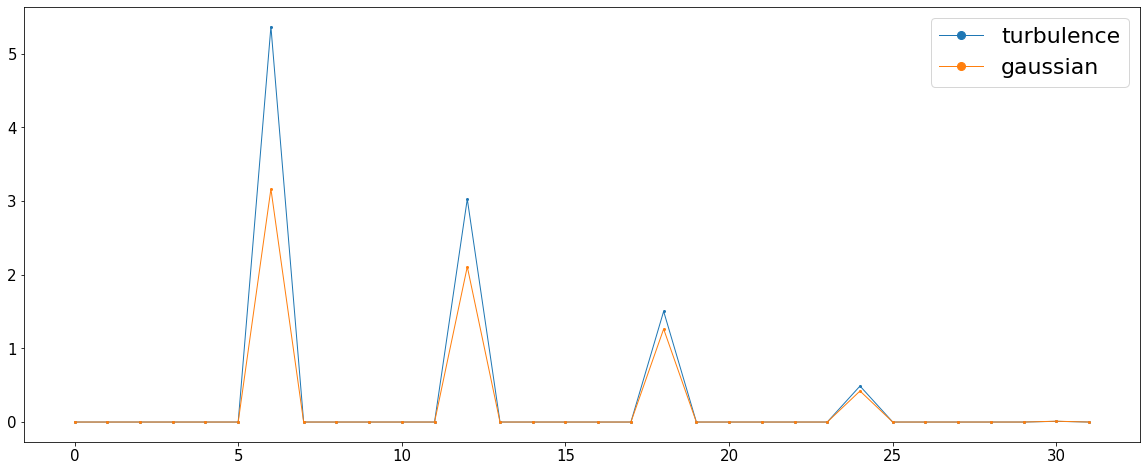

In [49]:
plt.plot(sum2l,label="turbulence")
plt.plot(sum2g,label="gaussian")
plt.legend()
plt.show()

In [6]:
def gen_traj(npart, run, it, noise=None):
    path = f'/scratch/scarpolini/gaussian/wgangp/runs/{run}/{it}_gen.h5'
    gen = load_model(path)
    if noise.all==None: 
        trajs = gen.predict(np.random.normal(0, 1, size=(npart, 100)))
        M = 10.273698864467972
        m = -9.970374739869616
        semidisp = (M-m)/2.
        media = (M+m)/2.
        trajs = trajs*semidisp + media
    else: 
        trajs = gen.predict(noise)
        M = 10.273698864467972
        m = -9.970374739869616
        semidisp = (M-m)/2.
        media = (M+m)/2.
        trajs = trajs*semidisp + media
    return trajs

In [7]:
generator = load_model(f'/scratch/scarpolini/gaussian/wgangp/runs/{16}/{1750}_gen.h5')

W0822 18:15:12.652012 47941916446208 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 18:15:12.656409 47941916446208 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 18:15:12.726770 47941916446208 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (fr

In [9]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

(-0.2, 0.2)

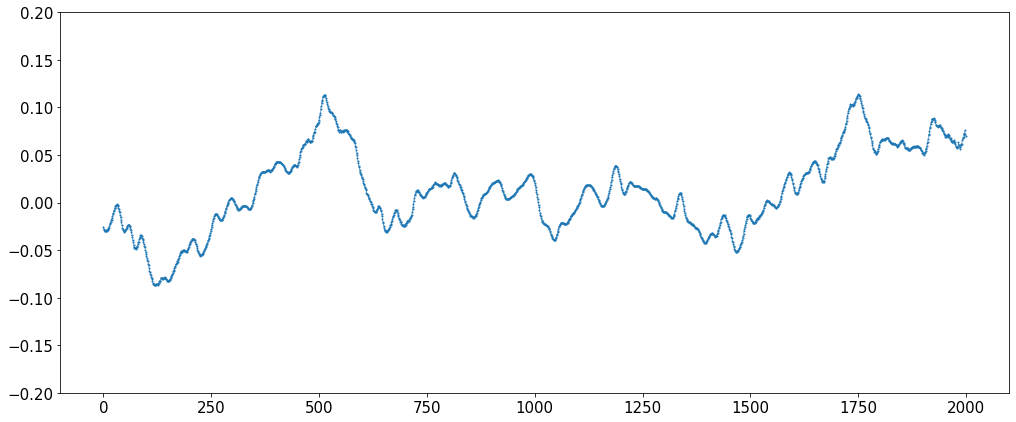

In [14]:
noise = np.random.normal(0, 1, size=(1, 100))

M = 0.2710607938691473 
m = -0.27237746706221777
semidisp = (M-m)/2.
media = (M+m)/2.
plt.plot(generator.predict(noise).squeeze().T*semidisp + media)
plt.ylim(-0.2,0.2)

In [15]:
noise[0]

array([-3.34571409e-01, -1.14853340e-04,  7.17645592e-01, -7.11737822e-01,
       -1.67468824e+00, -3.01687876e-01, -8.68837538e-01,  8.04714217e-02,
        4.20115333e-01,  6.70812230e-01, -3.19171928e-01, -1.05803312e+00,
        1.09391521e+00,  1.27017579e+00,  9.06759675e-01, -6.34586973e-01,
       -5.22799524e-01,  5.96516275e-01,  1.96512617e+00,  1.98440710e-01,
       -1.41541554e-01, -1.20230544e+00,  1.72977664e-01,  1.33521158e-01,
        5.35073821e-01, -1.53526162e+00,  1.38170853e+00, -2.00156840e-01,
       -7.34940519e-01,  1.05776595e+00,  4.09101203e-01,  3.82686466e-01,
       -8.41618963e-01,  7.11545661e-01,  1.82183937e-01,  1.40524766e+00,
        1.46252681e+00,  3.67272617e-01, -4.05803712e-01, -8.68766847e-01,
       -1.27884078e-01, -9.82046910e-02,  8.36972498e-01,  1.07206385e+00,
        9.14704567e-03,  1.55401159e-01,  8.02579975e-01, -1.10291713e+00,
        1.27578340e-01, -6.26158933e-01,  8.59053177e-01,  1.44749748e+00,
        4.76767567e-01, -

In [17]:
nn = [0, 250, 1750]
rr = [14,14,16]

for ii in range(len(nn)):
    print(rr[ii], nn[ii])
    if ii>0: trajs = np.r_[trajs, gen_traj(10,rr[ii],nn[ii], noise=noise[0:1,:])]
    else: trajs = gen_traj(1,rr[ii],nn[ii], noise=noise[0:1,:])

14 0


W0822 18:18:40.160617 47941916446208 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


14 250


W0822 18:18:41.192096 47941916446208 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


16 1750


W0822 18:18:42.439949 47941916446208 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [18]:
np.save('gen_trajs_run16', trajs)

# prova con filtri passa alto

In [41]:
from scipy import fft, ifft

In [63]:
tt = gen[0,:,0]

def gaus_extr(array):
    """
    performs a multiplication of the extreme points of
    an array with a gaussian array. In this way the 
    array goes to zero smoothly at its extremes.
    sigma is the std of the gaussian array. The array
    is truncated at 3sigma.
    """
    sigma = 10
    xx = np.arange(0,int(sigma*3))
    kern = np.exp(-xx**2./(2*sigma**2))
    kern = kern / kern[0]
    aa = np.r_[kern[::-1],[1.]*(len(array)-2*len(xx)),kern]
    return aa * array

corrected_tt = gaus_extr(tt)

In [64]:
TT = fft(tt)
iTT = ifft(TT)

In [65]:
corrected_TT = fft(corrected_tt)
corrected_iTT = ifft(corrected_TT)

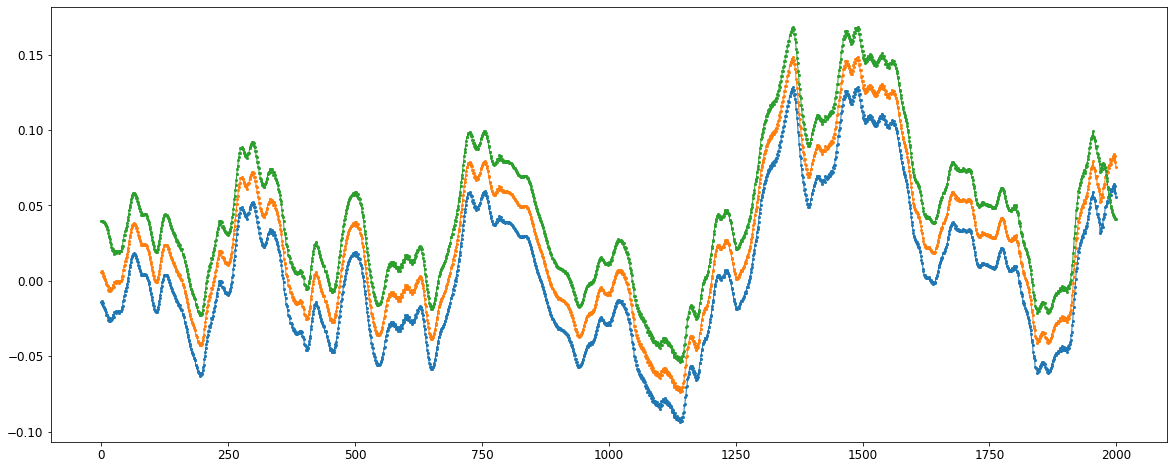

In [67]:
plt.plot(tt)
plt.plot(iTT+0.02)
plt.plot(corrected_iTT+ 0.04)
#plt.plot(np.abs(TT))

# ora pongo a zero le freqenze minori di una certa soglia:

In [104]:
def high_pass_filter(array, omega_min):
    array = fft(array)
    
    if len(array)%2==0:
        pos_freq_number = len(array)//2 - 1
        neg_freq_number = len(array)//2
    else:        
        return 0.
    
    aa = np.r_[[1.],[0.]*omega_min,[1.]*(pos_freq_number-omega_min),[1.]*(neg_freq_number-omega_min),[0.]*omega_min]
    return ifft(array*aa)

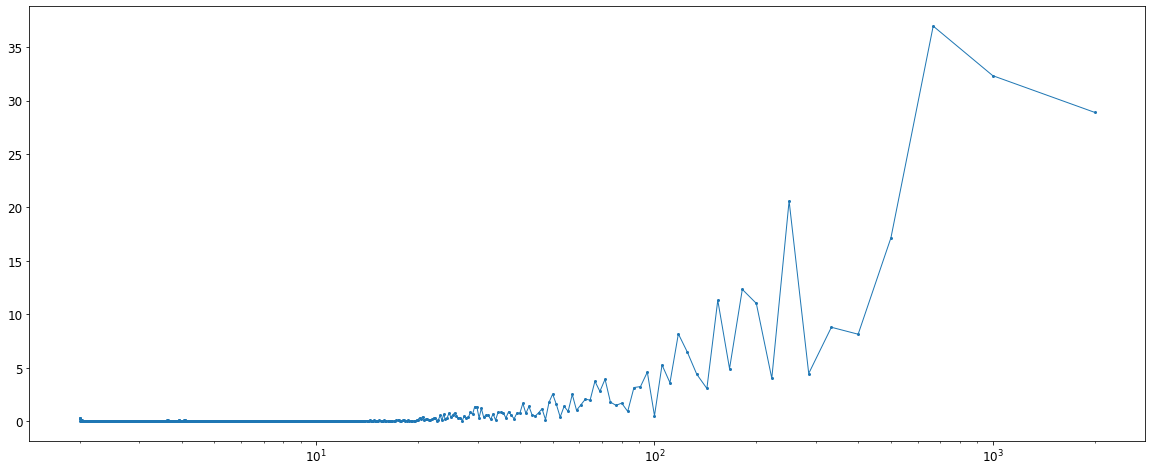

In [125]:
tt = gen[0,:,0]
tt = gaus_extr(tt)
TT = fft(tt)
xx = 2000/np.arange(1,TT.size//2-1)
plt.plot(xx,np.abs(TT[1:TT.size//2-1]))
plt.xscale('log')
#plt.xlim()

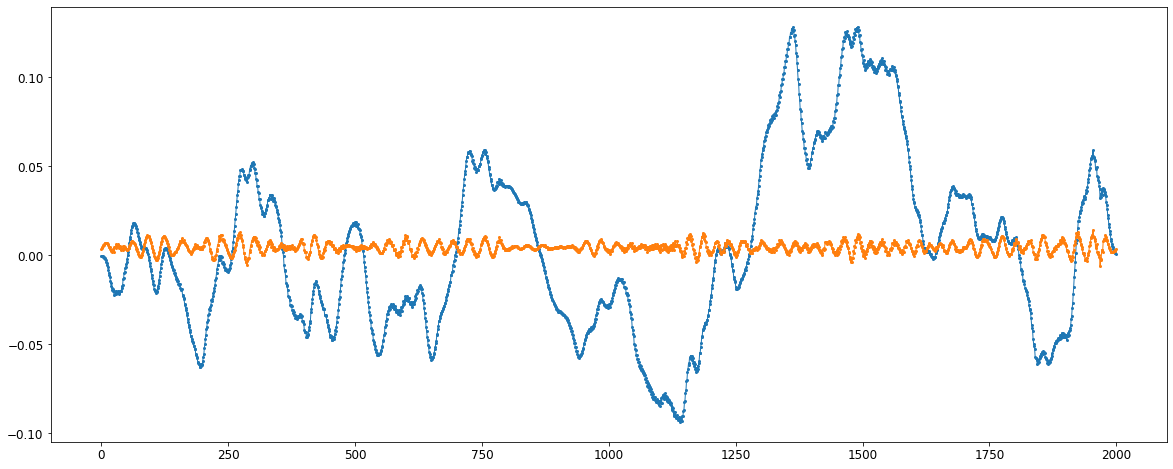

In [132]:
plt.plot(tt)
plt.plot(high_pass_filter(tt,50))